In [247]:
from astropy.io import fits
import numpy as np
from astropy import units as u
import pandas as pd

In [248]:
cat_file = '/home/juliantearney/Downloads/cdfs_v1_6_11.cat'
data = pd.read_csv(cat_file, sep=' ', header=0)
data.columns = ['id', 'x', 'y', 'ra', 'dec', 'SEflags', 'iso_area', 'fap_Ksall', 'eap_Ksall', 'apcorr', 'Ks_ratio', 'fapcirc07_Ksall', 'eapcirc07_Ksall', 'apcorr07', 'fcirc07_Ksall', 'ecirc07_Ksall', 'fauto_Ksall', 'flux50_radius', 'a_vector', 'b_vector', 'kron_radius', 'f_Ksall', 'e_Ksall', 'w_Ksall', 'f_B', 'e_B', 'w_B', 'f_I', 'e_I', 'w_I', 'f_R', 'e_R', 'w_R', 'f_U', 'e_U', 'w_U', 'f_V', 'e_V', 'w_V', 'f_Z', 'e_Z', 'w_Z', 'f_Hs', 'e_Hs', 'w_Hs', 'f_Hl', 'e_Hl', 'w_Hl', 'f_J1', 'e_J1', 'w_J1', 'f_J2', 'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_Ks', 'e_Ks', 'w_Ks', 'f_KsHI', 'e_KsHI', 'w_KsHI', 'f_NB118', 'e_NB118', 'w_NB118', 'f_NB209', 'e_NB209', 'w_NB209', 'f_F098M', 'e_F098M', 'w_F098M', 'f_F105W', 'e_F105W', 'w_F105W', 'f_F125W', 'e_F125W', 'w_F125W', 'f_F140W', 'e_F140W', 'w_F140W', 'f_F160W', 'e_F160W', 'w_F160W', 'f_F814W', 'e_F814W', 'w_F814W', 'f_IA484', 'e_IA484', 'w_IA484', 'f_IA527', 'e_IA527', 'w_IA527', 'f_IA574', 'e_IA574', 'w_IA574', 'f_IA598', 'e_IA598', 'w_IA598', 'f_IA624', 'e_IA624', 'w_IA624', 'f_IA651', 'e_IA651', 'w_IA651', 'f_IA679', 'e_IA679', 'w_IA679', 'f_IA738', 'e_IA738', 'w_IA738', 'f_IA767', 'e_IA767', 'w_IA767', 'f_IA797', 'e_IA797', 'w_IA797', 'f_IA856', 'e_IA856', 'w_IA856', 'f_WFI_V', 'e_WFI_V', 'w_WFI_V', 'f_WFI_Rc', 'e_WFI_Rc', 'w_WFI_Rc', 'f_WFI_U38', 'e_WFI_U38', 'w_WFI_U38', 'f_tenisK', 'e_tenisK', 'w_tenisK', 'f_IRAC_36', 'e_IRAC_36', 'w_IRAC_36', 'f_IRAC_45', 'e_IRAC_45', 'w_IRAC_45', 'f_IRAC_58', 'e_IRAC_58', 'w_IRAC_58', 'f_IRAC_80', 'e_IRAC_80', 'w_IRAC_80', 'wmin_optical', 'wmin_hst_optical', 'wmin_fs', 'wmin_jhk', 'wmin_hst', 'wmin_irac', 'wmin_all', 'star', 'nearstar', 'use', 'snr', 'use_nosnr', 'z_spec', 'garbage']
ra_values = data['ra'].values
dec_values = data['dec'].values
z_spec = data['z_spec'].values
gal_ids = np.array([7172, 7448, 7453, 7629, 7706, 7814, 7836, 7856, 7867, 7887, 7932, 7968, 8020,
           8074, 8116, 8131, 8206, 8207, 8316, 8366, 8643, 8706, 8851, 8926, 8943, 8946,
           9048, 9087, 9101, 9179, 9323, 9371, 9512, 9576, 9586, 9652, 9698, 9805, 10017,
           10050, 10066, 10214, 10224, 10229, 10287, 10316, 10330, 10415, 10489, 10668, 10677,
           10685, 10804, 10834, 10926, 10930, 10972, 11068, 11137, 11167, 11172, 11181, 11218,
           11303, 11548, 11714, 11777, 11885, 12031, 12047, 12087, 12293, 12307, 12348, 12418, 12421,
           12422, 12552, 12628, 12761, 12768, 12811, 12856, 12898, 12903, 12958, 13155, 13406, 13939,
           13954, 14122, 14286, 14310, 14339, 14467, 14672, 14733, 14994, 15097, 15111, 15256, 15401,
           15639, 15782, 15870, 15881, 15902, 16072, 16392, 16476, 16507, 16551, 16720, 16927, 17317, 17335,
           17408, 17719, 17722, 17804, 17810, 17829, 18332, 18459, 18514, 18542, 18645, 18649, 18691, 18742,
           18856, 19172, 19286, 19310, 19417, 19459, 19491, 19621, 19762, 19796, 19863, 19985, 20257, 20920, 20935,
           21027, 21067, 21297, 21303, 21435, 21731, 21759, 21962, 22136, 22590, 22771, 22919, 23168, 23185, 23488, 23833, 23898, 24110]).astype(int)
index_arr =[]
for i in gal_ids:
    index = np.where(data['id'] == i)[0][0]
    index_arr.append(index)
index_arr = np.array(index_arr).astype(int)    

datapath = '/home/juliantearney/Downloads/'
c0 = fits.open(datapath+'hlsp_jades_jwst_nircam_goods-s-deep_photometry_v2.0_catalog.fits')

def find_galaxy(catalog, ra_target, dec_target, tolerance=1e-6):
    """
    Find a galaxy in a catalog by matching RA and DEC within a specified tolerance.

    Parameters:
        catalog (list of dict): The catalog, where each entry is a dictionary with 'RA' and 'DEC'.
        ra_target (float): The RA of the galaxy to match.
        dec_target (float): The DEC of the galaxy to match.
        tolerance (float): The tolerance for matching RA and DEC (default: 1e-6 degrees).

    Returns:
        list of dict: A list of galaxies matching the target RA and DEC.
    """
    matched_galaxies = []

    for galaxy in catalog:
        ra_diff = abs(galaxy['RA'] - ra_target)
        dec_diff = abs(galaxy['DEC'] - dec_target)
        
        # Check if both RA and DEC differences are within the tolerance
        if ra_diff <= tolerance and dec_diff <= tolerance:
            matched_galaxies.append(galaxy['ID']) # Also appe
    
    return matched_galaxies

In [249]:
target_ra_values = ra_values[index_arr]
target_dec_values = dec_values[index_arr]
target_z_spec_values = z_spec[index_arr]

In [250]:
c0[3].data['RA']

array([53.11341212, 53.11363908, 53.1132915 , ..., 53.13286838,
       53.12923732, 53.22324066], shape=(94000,), dtype='>f8')

In [259]:
tol= (35*0.1875)*u.arcsec.to(u.deg)
print(tol)
matched_galaxies = []
for i in range(target_ra_values.size):
    matched_galaxies.append(find_galaxy(catalog=c0[3].data, ra_target=target_ra_values[i], dec_target=target_dec_values[i], tolerance=tol))

0.0018229166666666667


In [262]:
len(matched_galaxies)

163

In [260]:
catalog_index = []
for i in range(len(target_ra_values)): # looping through our target galaxies
    index = []
    for j in range(len(matched_galaxies[i])):  # looping through our matched catalog galaxies
        index .append(np.where(c0[3].data['id'] == matched_galaxies[i][j])[0][0])
        
    catalog_index.append(index)
catalog_index = np.array(catalog_index, object)


In [261]:
np.save('catalog_index', catalog_index)

In [214]:
len(catalog_index[0]), len(catalog_index[1])

(37, 55)

In [263]:
target_index = 162 # index to our galaxies

ra_catalog  = c0[3] .data['RA']      [catalog_index[target_index]]
dec_catalog = c0[3] .data['DEC']     [catalog_index[target_index]]
phot_z      = c0[-1].data['EAZY_z_a'][catalog_index[target_index]]
z_99l       = c0[-1].data['EAZY_l99'][catalog_index[target_index]] #
z_99u       = c0[-1].data['EAZY_u99'][catalog_index[target_index]]

In [264]:
target_z_spec_values[4]

np.float64(-99.0)

Set DATE-AVG to '2022-10-08T01:38:08.426' from MJD-AVG.
Set DATE-END to '2022-10-08T04:53:29.401' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    22.225686 from OBSGEO-[XYZ].
Set OBSGEO-H to 1235003121.785 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


pos ra: 53.1717606 deg & pos dec: -27.733628633333332 deg


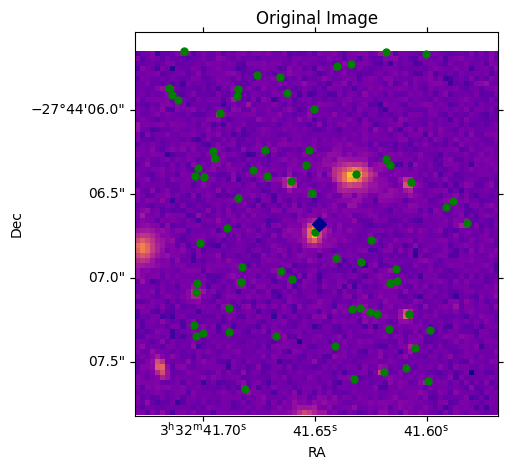

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from photutils.datasets import make_100gaussians_image
from astropy.wcs import WCS
from photutils.segmentation import make_2dgaussian_kernel, detect_sources, deblend_sources
from photutils.background import Background2D, MedianBackground, SExtractorBackground
from photutils.segmentation import SourceCatalog, SegmentationImage
from astropy.visualization import simple_norm
from astropy.nddata import NDData
from astropy import units as u
from photutils.segmentation import detect_threshold
import matplotlib as mpl
# NFFT for Fourier Transforms
import nfft
import os
import sys
from IPython.display import display, HTML
# Astropy Cosmology
from astropy.cosmology import Planck18, FlatLambdaCDM
import pandas as pd  # Importing pandas
from astropy.io import fits
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from scipy.ndimage import zoom
from skimage.transform import resize
from astropy.convolution import convolve, Gaussian2DKernel
from photutils.segmentation import deblend_sources


fits_file = '/home/juliantearney/Downloads/jades_356.fits'

# Load the FITS image
with fits.open(fits_file) as hdul:
    image_data = hdul[1].data
    header = hdul[1].header

wcs = WCS(header)

pos = SkyCoord(target_ra_values[target_index]*u.deg, target_dec_values[target_index]*u.deg-0.3*u.arcsecond, frame='icrs')
print(f'pos ra: {pos.ra} & pos dec: {pos.dec}')
size = (450, 450) * u.pixel
cutout = Cutout2D(image_data, pos, size=size, wcs=wcs)
zoom_factor = 0.159971962
zoomed_image = zoom(cutout.data, zoom_factor)

catalog_coords = SkyCoord(ra_catalog * u.deg, dec_catalog * u.deg, frame='icrs')
catalog_px, catalog_py = cutout.wcs.world_to_pixel(catalog_coords)

target_coords = SkyCoord(target_ra_values[target_index] * u.deg, target_dec_values[target_index] * u.deg, frame='icrs')
target_px, target_py = cutout.wcs.world_to_pixel(target_coords)

# Plot the overlaid RA/Dec points

norm_img = simple_norm(zoomed_image, 'log')
plt.subplot(111, projection=cutout.wcs)
plt.imshow(zoomed_image, origin="lower", cmap="plasma", norm=norm_img)
#plt.plot(ra_catalog*u.deg.to(u.hourangle), dec_catalog, marker='o', markersize=5, ls='')
plt.plot(catalog_px*zoom_factor, catalog_py*zoom_factor, marker='o', color='g', markersize=5, linestyle='')

plt.plot(target_px*zoom_factor, target_py*zoom_factor, marker='D', color='darkblue', markersize=7, linestyle='')

plt.title("Original Image")
plt.xlabel("RA")
plt.ylabel("Dec")

plt.tight_layout()
plt.show()
